In [83]:
import numpy as np
import matplotlib.pyplot as plt

#### 1. 定义红包数据结构

In [84]:
class RedPackage:
    def __init__(self, remainSize = 1, remainMoney = 0.01) -> None:
        self.remainSize = remainSize
        self.remainMoney = remainMoney

#### 2. 二倍均值法

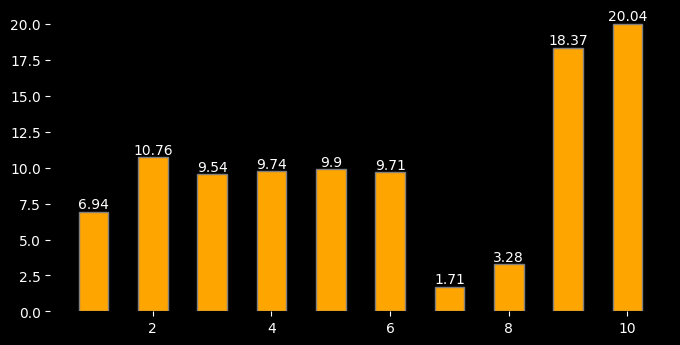

In [139]:
def getRandomMoney(redPackage):
    # 如果只有一个红包，则将金额全部返回
    if redPackage.remainSize == 1:
        redPackage.remainSize -= 1
        return np.floor(redPackage.remainMoney * 100) / 100
    min = 0.01
    max = redPackage.remainMoney * 2 / redPackage.remainSize
    rand = np.random.rand()
    money = rand * max
    money = min if money <= min else money
    money = np.floor(money * 100) / 100
    redPackage.remainSize -= 1
    redPackage.remainMoney -= money
    return money

def draw(x_data, y_data):
    # 绘制图形
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
    plt.rcParams['axes.unicode_minus'] = False
    fig, ax = plt.subplots(figsize=(8,4), dpi=100)
    # 柱状图颜色
    color = 'coral'
    # 柱状图
    bar = plt.bar(x_data, y_data, 0.5, color='orange',edgecolor='grey')
    # 设置坐标轴标题
    ax.set_ylabel("", fontsize=12, color='black', alpha=0.7, rotation=360)
    # 显示数据标签
    for a,b in zip(x_data, y_data):
        plt.text(a,b,
                b,
                ha='center', 
                va='bottom',
                )
    # 边框隐藏
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

# 测试
size = 10
luckyMoney = 100
redPackage = RedPackage(size, luckyMoney)
splitMoney = []
for i in range(0, size):
    splitMoney.append(getRandomMoney(redPackage))
x_data = [x for x in range(1, size + 1)]
draw(x_data=x_data, y_data=splitMoney)

#### 封装整个过程进行多次测试

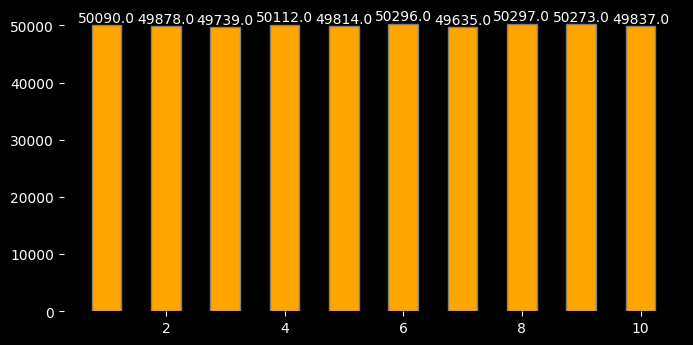

In [141]:
def testGetRandomMoney(times=1, size=1, money=0.01):
    splitMoney = [0] * size
    for i in range(0, times):
        redPackage = RedPackage(size, money)
        for k in range(0, size):
            splitMoney[k] += getRandomMoney(redPackage)
    for i in range(0, size):
        splitMoney[i] = np.floor(splitMoney[i])
    # 绘制图形
    x_data = [x for x in range(1, size + 1)]
    draw(x_data=x_data, y_data=splitMoney)
testGetRandomMoney(times=5000, size=10, money=100)

#### 测试最大红包出现的位置

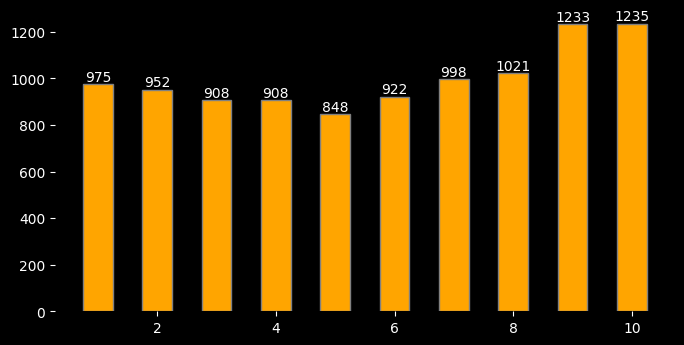

In [161]:
def findBestLuckyPosition(times=1, size=1, money=0.01):
    count = [0] * size
    for i in range(0, times):
        splitMoney = [0] * size
        redPackage = RedPackage(size, money)
        for k in range(0, size):
            splitMoney[k] = getRandomMoney(redPackage)
        index = np.argmax(splitMoney)
        count[index] += 1
    x_data = [x for x in range(1, size + 1)]
    draw(x_data, y_data=count)
findBestLuckyPosition(times=10000, size=10, money=100)

#### 3. 随机分配法

In [87]:
def getRandomMoneyByRandom(redPackage):
    if redPackage.remainSize == 1:
        redPackage.remainSize -= 1
        return np.floor(redPackage.remainMoney * 100) / 100
    min = 0.01
    rand = np.random.rand()
    money = np.floor(rand * redPackage.remainMoney * 100) / 100
    money = min if money <= min else money
    redPackage.remainSize -= 1
    redPackage.remainMoney -= money
    return money

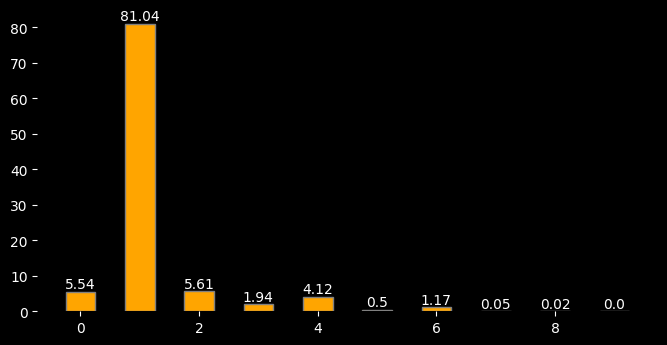

In [163]:
size = 10
luckyMoney = 100
redPackage = RedPackage(size, luckyMoney)
splitMoney = []
for i in range(0, size):
    splitMoney.append(getRandomMoneyByRandom(redPackage))
# 绘制图形
x_data = [x for x in range(0, size)]
draw(x_data, y_data=splitMoney)

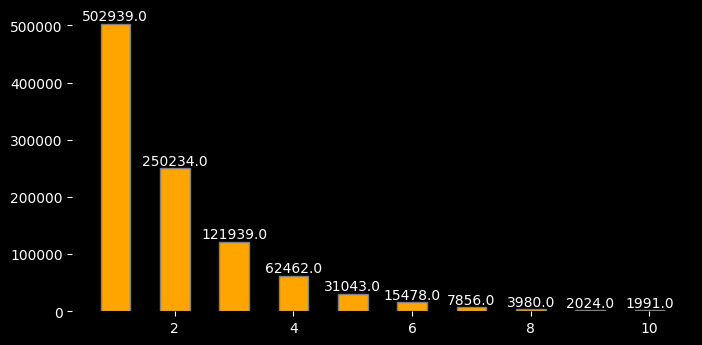

In [167]:
def testGetRandomMoneyByRandom(times=1, size=1, money=0.01):
    splitMoney = [0] * size
    for i in range(0, times):
        redPackage = RedPackage(size, money)
        for k in range(0, size):
            splitMoney[k] += getRandomMoneyByRandom(redPackage)
    for i in range(0, size):
        splitMoney[i] = np.floor(splitMoney[i])
    # 绘制图形
    x_data = [x for x in range(1, size + 1)]
    draw(x_data, y_data=splitMoney)
testGetRandomMoneyByRandom(times=10000, size=10, money=100)

#### 4.线段切割法

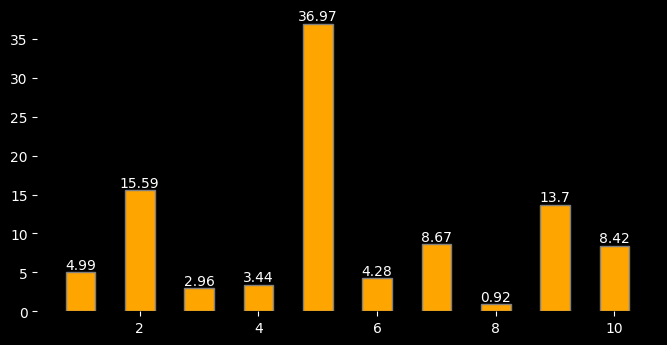

In [209]:
def splitLuckyMoney(redPackage):
    if redPackage.remainSize == 1:
        redPackage.remainSize -= 1
        return [np.floor(redPackage.remainMoney * 100) / 100]
    totalMoney = redPackage.remainMoney
    size = redPackage.remainSize
    areasCount = size - 1
    # 生成区间
    areas = np.sort(totalMoney * np.random.random((areasCount)) + 0.01)
    splitMoney = [0] * areasCount
    for i in range(len(areas)):
        if i == 0:
            splitMoney[i] = areas[i]
        else:
            splitMoney[i] = areas[i] - areas[i-1]
    splitMoney.append(totalMoney - areas[-1])
    for i in range(0, size):
        splitMoney[i] = np.floor(splitMoney[i] * 100) / 100
    return splitMoney

size = 10
luckyMoney = 100
redPackage = RedPackage(size, luckyMoney)
splitMoney = splitLuckyMoney(redPackage)
x_data = [x for x in range(1, size + 1)]
draw(x_data, splitMoney)

#### 测试10000次切面条法分配红包

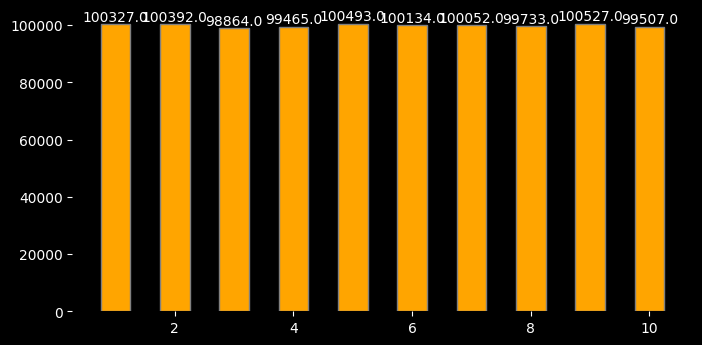

In [218]:
def testSplitLuckyMoney(times=1, size=1, money=0.01):
    splitMoney = [0] * size
    for i in range(0, times):
        redPackage = RedPackage(size, money)
        tempMoney = splitLuckyMoney(redPackage)
        splitMoney = [splitMoney[i] + tempMoney[i] for i in range(len(tempMoney))]
    splitMoney = [np.floor(splitMoney[i]) for i in range(len(splitMoney))]
    x_data = [x for x in range(1, size + 1)]
    draw(x_data, y_data=splitMoney)

testSplitLuckyMoney(times=10000, size=10, money=100)